In [5]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

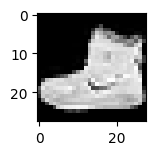

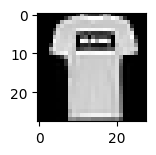

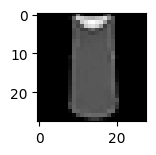

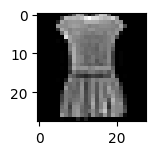

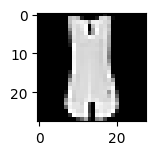

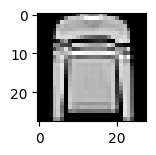

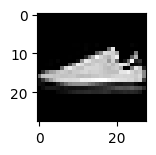

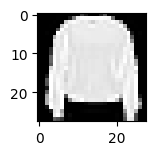

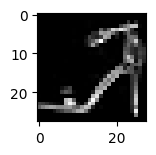

In [8]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_X[i],cmap='gray')
  plt.show()

In [6]:
def add_gaussian_noise(image, mean=0, std_dev=20):
    row, column = image.shape
    gaussian_noise = np.random.normal(mean, std_dev, (row, column))
    noisy_image = np.zeros_like(image, dtype='uint8')
    for i in range(row):
        for j in range(column):
            noisy_pixel = int(image[i][j]) + int(gaussian_noise[i][j])
            if noisy_pixel > 255:
                noisy_pixel = 255
            elif noisy_pixel < 0:
                noisy_pixel = 0
            noisy_image[i][j] = noisy_pixel
    return noisy_image

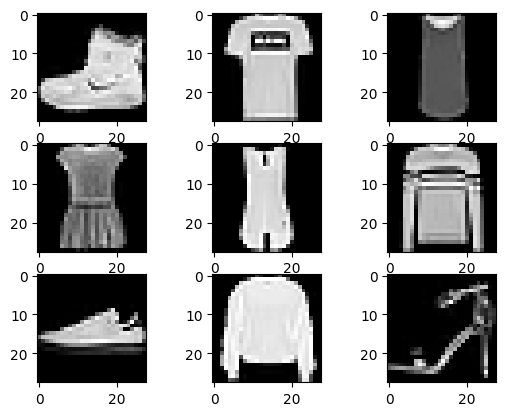

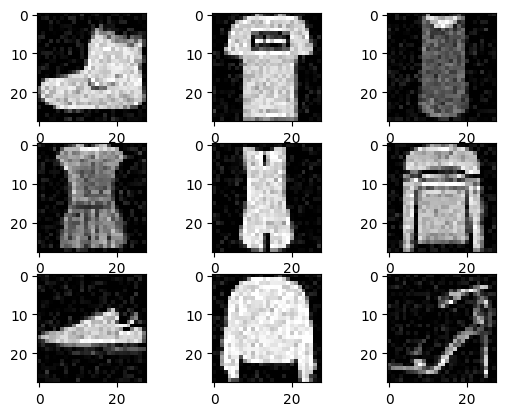

In [13]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_X[i], cmap='gray')
plt.show()

noisy_images = []
for image in train_X:
    noisy_images.append(add_gaussian_noise(image))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(noisy_images[i], cmap='gray')
plt.show()


In [14]:
def filtered_image(image, mask):

  row, column = image.shape
  mask_height, mask_width = mask.shape
  filtered_image = np.zeros((row, column))
  for i in range(row-mask_height+1):
    for j in range(column-mask_width+1):
       rows = range(i, i+mask_height)
       columns = range(j, j+mask_width)
       part = image[np.ix_(rows, columns)]*mask
       filtered_image[i, j] = part.sum()

  return filtered_image

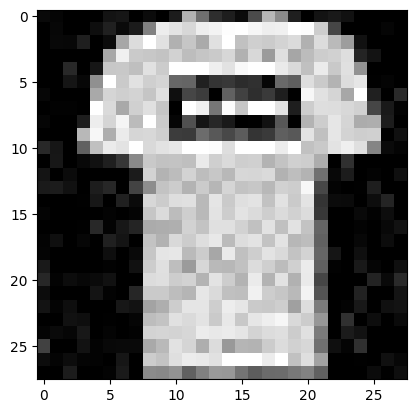

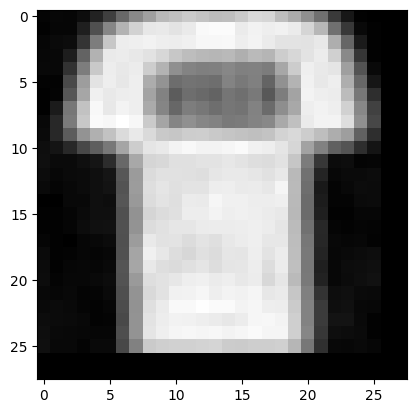

In [19]:
mask_size = 3
mask = np.ones((mask_size, mask_size)) / (mask_size ** 2)
plt.imshow(noisy_images[1], cmap='gray')
plt.show()
removed_noise = filtered_image(noisy_images[1], mask)
plt.imshow(removed_noise, cmap='gray')
plt.show()

KeyboardInterrupt: 

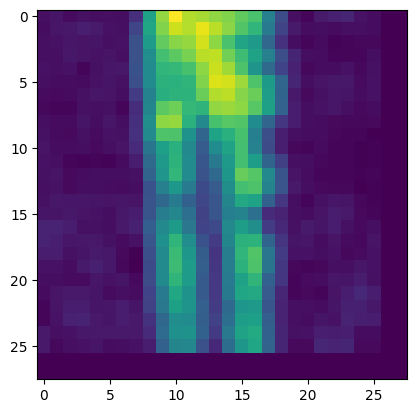

In [20]:
mask_size = 3

mask = np.ones((mask_size, mask_size)) / (mask_size ** 2)
for i in range(len(noisy_images)):
  removed_noise = filtered_image(noisy_images[i], mask)
  plt.imshow(removed_noise)

In [30]:
#Adding Salt and Pepper Noise
import random
def add_salt_pepper_noise(image):
  row , column = image.shape
  noisy_image = np.copy(image)
  number_of_pixels = random.randint(300, 8000)
  #white
  for i in range(number_of_pixels):
      y_coord = random.randint(0, row - 1)
      x_coord = random.randint(0, column - 1)
      noisy_image[y_coord][x_coord] = 255
  number_of_pixels = random.randint(300 , 8000)
  #black
  for i in range(number_of_pixels):
      y_coord = random.randint(0, row - 1)
      x_coord = random.randint(0, column - 1)
      noisy_image[y_coord][x_coord] = 0
  return noisy_image

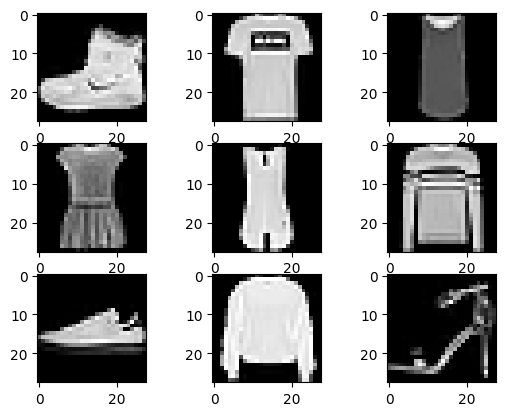

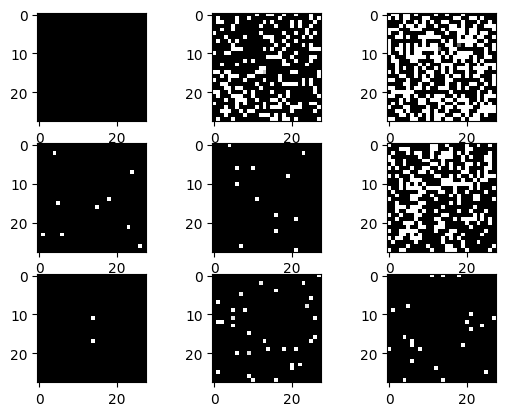

In [31]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_X[i], cmap='gray')
plt.show()
salt_n_pepper= []
for image in train_X:
    salt_n_pepper.append(add_salt_pepper_noise(image))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(salt_n_pepper[i], cmap='gray')
plt.show()

In [32]:
def median_filter(image):
  row, column = image.shape
  mh, mw = 3, 3
  new = np.zeros((row, column))
  for i in range(row - mh + 1):
    for j in range(column - mw + 1):
      rows = range(i, i + mh)
      cols = range(j, j + mw)
      part = np.sort(np.ravel(image[np.ix_(rows, cols)]))
      new[i,j] = part[5]

  return new

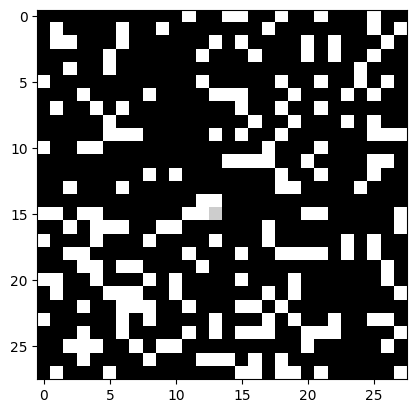

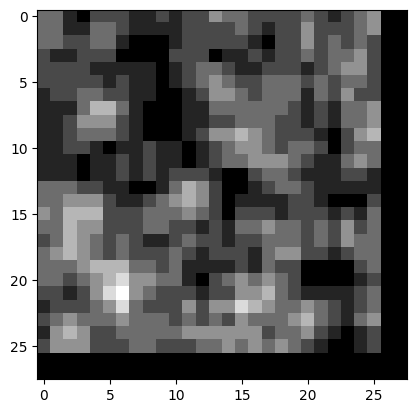

In [33]:
mask_size = 3

mask = np.ones((mask_size, mask_size)) / (mask_size ** 2)
plt.imshow(salt_n_pepper[1], cmap='gray')
plt.show()
removed_noise = filtered_image(salt_n_pepper[1], mask)
plt.imshow(removed_noise, cmap='gray')
plt.show()